# Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Get the Dataset at:
* UCI machine learning repository, https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

## About the Project
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.

## Objective
* Understand the Dataset & cleanup (if required).
* Explore the dataset and perform an EDA.
* Try to build a model to predict Wine Type(red or white)
* Try to build a model to predict Wine Quality(low, medium, or high)
* Build an interactive model

### This notebook contains the Predictive Analysis of the project!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc 
from IPython.core.display import HTML

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

from sklearn.preprocessing import LabelEncoder
import keras

import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn import tree
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

In [2]:
# To center our generated images
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))
                        
def train_predict_model(classifier, train_features, train_labels, test_features, test_labels):
    # build a model    
    classifier.fit(train_features, train_labels)
    # predict using a model
    predictions = classifier.predict(test_features) 
    return predictions    

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, labels=classes) 
    print(report)
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

In [4]:
def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step = 0.02, cmap = plt.cm.RdYlBu,
                                markers = None, alphas = None, colors = None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()

# Predictive Analysis

In [6]:
df_white = pd.read_csv("D:\DataSc\Datasets\winequality-white.csv", sep=";")
df_red = pd.read_csv("D:\DataSc\Datasets\winequality-red.csv", sep=";")

In [7]:
print(df_white.shape)
print(df_red.shape)

(4898, 12)
(1599, 12)


In [8]:
# store wine type as an attribute
df_white['wine_type'] = 'white'
df_red['wine_type'] = 'red'

# creating a label column based on quality
df_wines = pd.concat([df_white, df_red])
df_wines['quality_label'] = df_wines['quality'].apply(lambda value:'low' if value <=5
                                                                         else 'medium' if value <=7
                                                                         else 'high')
df_wines = df_wines.sample(frac=1, random_state=24).reset_index(drop=True)

In [9]:
df_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.8             0.340         0.33             9.7      0.036   
1            8.8             0.955         0.05             1.8      0.075   
2            6.7             0.240         0.29            14.9      0.053   
3            7.4             0.410         0.34             4.7      0.042   
4           10.8             0.320         0.44             1.6      0.063   
5            5.4             0.420         0.27             2.0      0.092   
6            6.6             0.260         0.56            15.4      0.053   
7            6.8             0.240         0.29             9.5      0.042   
8            5.9             0.290         0.32             1.4      0.022   
9            8.2             0.200         0.49             3.5      0.057   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 46.0                 172.0  0.99660  3.08       0.40   
1                  5.0                  19.0  0.99616  3.30       0.44   
2                 55.0                 136.0  0.99839  3.03       0.52   
3                 19.0                 127.0  0.99530  3.25       0.42   
4                 16.0                  37.0  0.99850  3.22       0.78   
5                 23.0                  55.0  0.99471  3.78       0.64   
6                 32.0                 141.0  0.99810  3.11       0.49   
7                 56.0                 157.0  0.99586  3.11       0.51   
8                 17.0                  47.0  0.98990  3.35       0.35   
9                 14.0                 108.0  0.99280  3.19       0.35   

   alcohol  quality wine_type quality_label  
0     10.2        5     white           low  
1      9.6        4       red           low  
2      9.0        5     white           low  
3     10.4        5     white           low  
4     10.0        6       red        medium  
5     12.3        7       red        medium  
6      9.3        5     white           low  
7     10.1        6     white        medium  
8     11.5        6     white        medium  
9     11.5        6     white        medium

In [10]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [11]:
df_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

### Predicting Wine Types

In [12]:
wtp_features = df_wines.iloc[:, :-3] # splitting the features
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(df_wines['wine_type']) # Class labels(red & white)

print(wtp_feature_names)
print(wtp_class_labels)
wtp_features.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
['white' 'red' 'white' ... 'red' 'white' 'white']


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.8             0.340         0.33             9.7      0.036   
1            8.8             0.955         0.05             1.8      0.075   
2            6.7             0.240         0.29            14.9      0.053   
3            7.4             0.410         0.34             4.7      0.042   
4           10.8             0.320         0.44             1.6      0.063   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 46.0                 172.0  0.99660  3.08       0.40   
1                  5.0                  19.0  0.99616  3.30       0.44   
2                 55.0                 136.0  0.99839  3.03       0.52   
3                 19.0                 127.0  0.99530  3.25       0.42   
4                 16.0                  37.0  0.99850  3.22       0.78   

   alcohol  
0     10.2  
1      9.6  
2      9.0  
3     10.4  
4     10.0

In [13]:
print("Features shape:    ", wtp_features.shape)
print("Label shape:       ", wtp_class_labels.shape)

Features shape:     (6497, 11)
Label shape:        (6497,)


In [14]:
# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(wtp_features, wtp_class_labels, test_size = 0.2, random_state = 23)

print("Train dataset size:     ", len(X_train))
print("Test dataset size:      ", len(X_test))
print("Features:    \n", list(wtp_feature_names))
print(Counter(y_train), Counter(y_test))

Train dataset size:      5197
Test dataset size:       1300
Features:    
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Counter({'white': 3911, 'red': 1286}) Counter({'white': 987, 'red': 313})


### Feature Scaling

In [15]:
# Define scalar
scaler = StandardScaler().fit(X_train)

X_train_SC = scaler.transform(X_train)
X_test_SC = scaler.transform(X_test)

## Predicting Wine Type (Red or White) using a Logistic Regression Model

In [16]:
lr = LogisticRegression()
%time lr.fit(X_train_SC, y_train)

CPU times: total: 0 ns
Wall time: 13.9 ms


LogisticRegression()

In [17]:
lr_prdiction = lr.predict(X_test_SC)

In [18]:
display_model_performance_metrics(true_labels = y_test, predicted_labels = lr_prdiction, classes = ['red', 'white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9908
Precision: 0.9908
Recall: 0.9908
F1 Score: 0.9907

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.99      0.97      0.98       313
       white       0.99      1.00      0.99       987

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          303    10
        white          2   985


[11/11] features ████████████████████ Time elapsed: 0 seconds

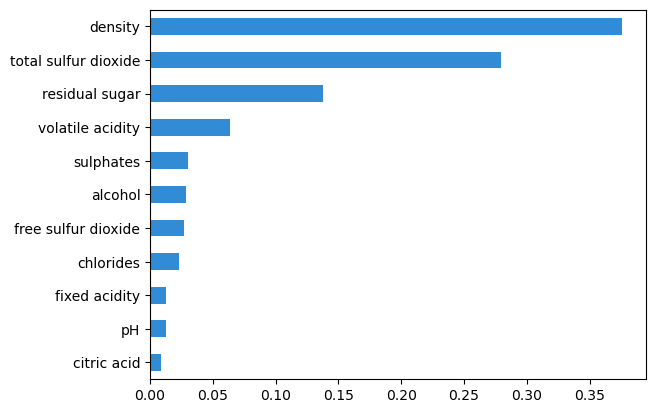

In [19]:
# Checking feature importance
feature_interpreter = Interpretation(X_test_SC, feature_names = wtp_feature_names)
im_model = InMemoryModel(lr.predict_proba, examples = X_train_SC, target_names = lr.classes_)
plots = feature_interpreter.feature_importance.plot_feature_importance(im_model, ascending=False) # plot to viz.

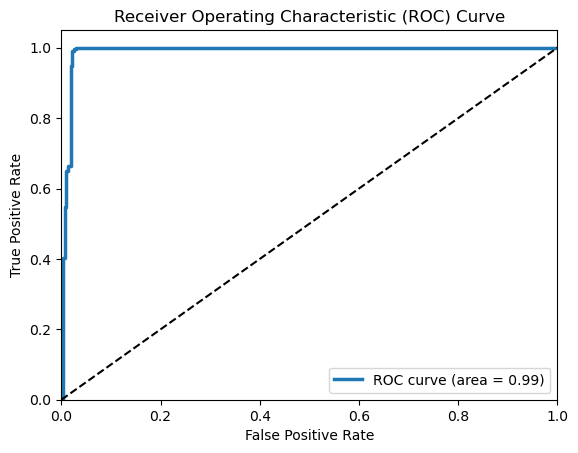

In [20]:
plot_model_roc_curve(lr, X_test_SC, y_test)

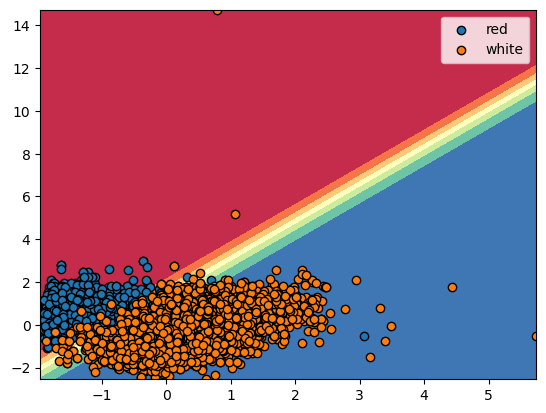

In [21]:
features_indices = [i for i, feature in enumerate(wtp_feature_names) if feature in ['density', 'total sulfur dioxide']]

plot_model_decision_surface(clf=lr, train_features=X_train_SC[:, features_indices], cmap = plt.cm.Spectral, 
                            train_labels = y_train, plot_step=0.02,
                                markers = None, alphas = None, colors = None)

## Predicting Wine Quality (low, medium, or high) using Decision Tree Classifier

In [22]:
wtp_features = df_wines.iloc[:,:-3] # splitting the features
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(df_wines['quality_label']) # target as of wine quality
wtp_class_names = ['low', 'medium', 'high'] 

print(wtp_feature_names)
print(wtp_class_labels)
wtp_features.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
['low' 'low' 'low' ... 'low' 'medium' 'low']


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.8             0.340         0.33             9.7      0.036   
1            8.8             0.955         0.05             1.8      0.075   
2            6.7             0.240         0.29            14.9      0.053   
3            7.4             0.410         0.34             4.7      0.042   
4           10.8             0.320         0.44             1.6      0.063   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 46.0                 172.0  0.99660  3.08       0.40   
1                  5.0                  19.0  0.99616  3.30       0.44   
2                 55.0                 136.0  0.99839  3.03       0.52   
3                 19.0                 127.0  0.99530  3.25       0.42   
4                 16.0                  37.0  0.99850  3.22       0.78   

   alcohol  
0     10.2  
1      9.6  
2      9.0  
3     10.4  
4     10.0

In [23]:
print("Features shape:    ", wtp_features.shape)
print("Label shape:       ", wtp_class_labels.shape)

Features shape:     (6497, 11)
Label shape:        (6497,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(wtp_features, wtp_class_labels, test_size = 0.2, random_state = 42)

print("Train dataset size:     ", len(X_train))
print("Test dataset size:      ", len(X_test))
print("Features:    \n", list(wtp_feature_names))
print(Counter(y_train), Counter(y_test))

Train dataset size:      5197
Test dataset size:       1300
Features:    
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Counter({'medium': 3158, 'low': 1883, 'high': 156}) Counter({'medium': 757, 'low': 501, 'high': 42})


In [25]:
# Define scalar
scaler = StandardScaler().fit(X_train)

X_train_SC = scaler.transform(X_train)
X_test_SC = scaler.transform(X_test)

In [26]:
dt = DecisionTreeClassifier()
%time dt.fit(X_train_SC, y_train)

CPU times: total: 31.2 ms
Wall time: 35 ms


DecisionTreeClassifier()

In [27]:
dt_prediction = dt.predict(X_test_SC) 
display_model_performance_metrics(true_labels = y_test, predicted_labels = dt_prediction, classes = wtp_class_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7323
Precision: 0.7339
Recall: 0.7323
F1 Score: 0.733

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.70      0.69      0.70       501
      medium       0.77      0.77      0.77       757
        high       0.43      0.50      0.46        42

    accuracy                           0.73      1300
   macro avg       0.63      0.65      0.64      1300
weighted avg       0.73      0.73      0.73      1300


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           348    152    1
        medium        147    583   27
        high            1     20   21


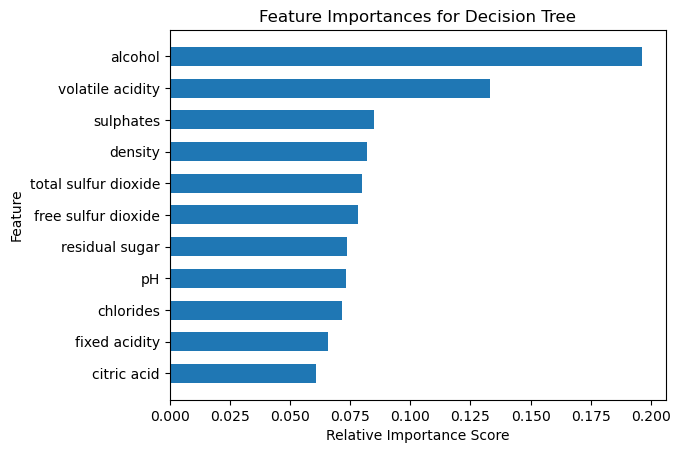

In [28]:
wqp_dt_feature_importances = dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wtp_feature_names, wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

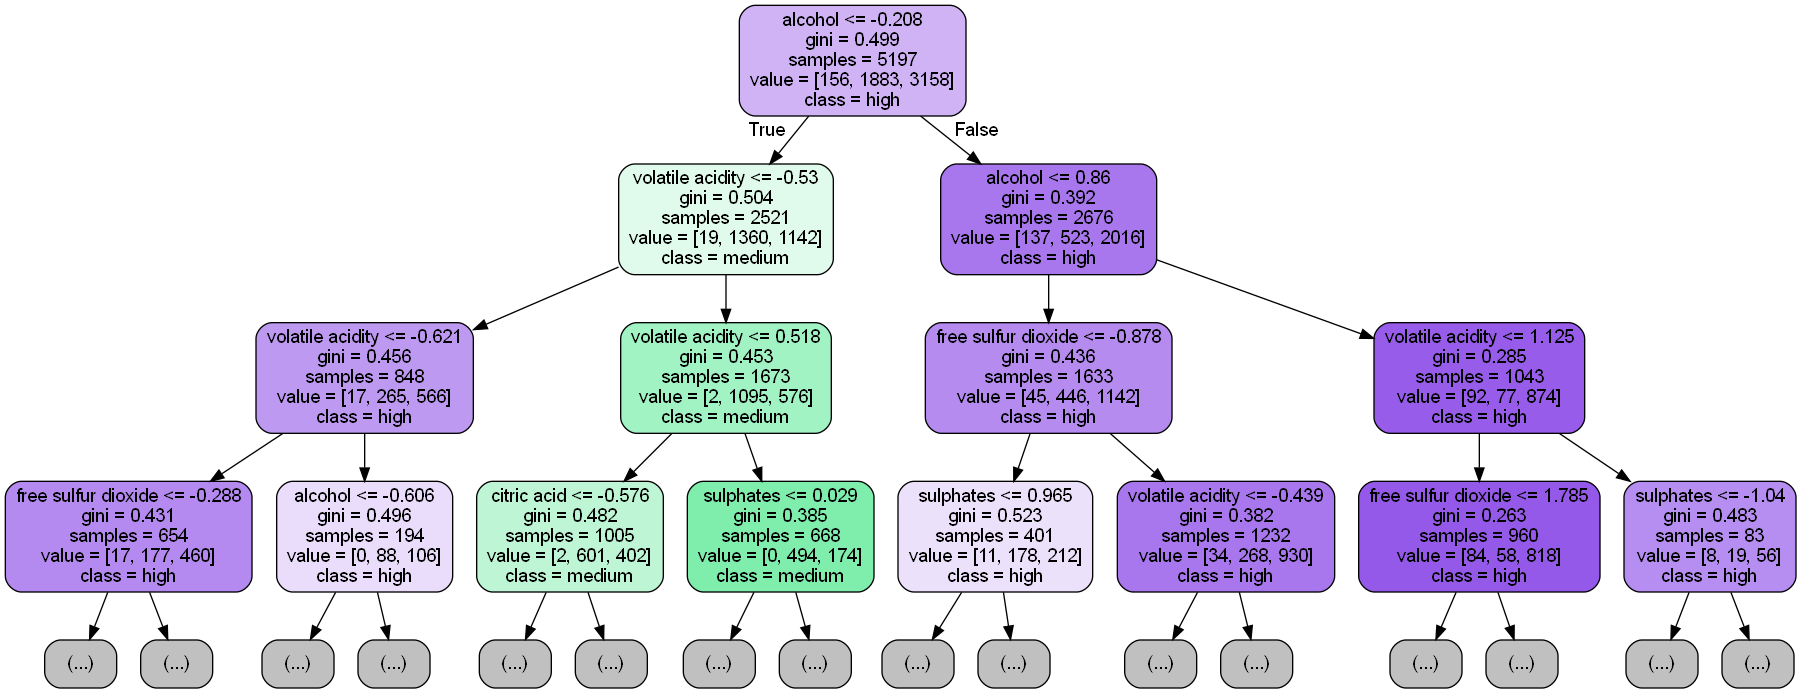

In [29]:
graph = Source(tree.export_graphviz(dt, out_file=None, class_names=wtp_class_names,
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=wtp_feature_names, max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

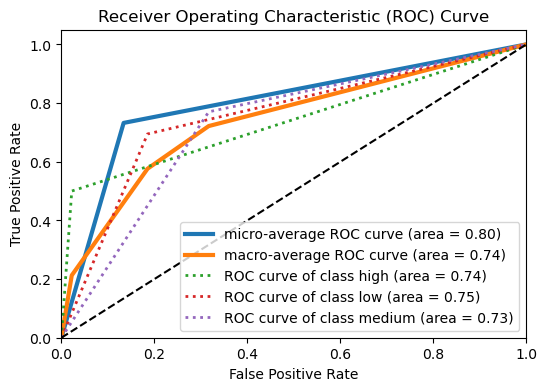

In [30]:
# ROC curve
plot_model_roc_curve(dt, X_test_SC, y_test)

## Predicting Wine Quality (low, medium, or high) using Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
%time rf.fit(X_train_SC, y_train)

rf_prediction = rf.predict(X_test_SC)
display_model_performance_metrics(true_labels = y_test, predicted_labels = rf_prediction, classes = wtp_class_names)

CPU times: total: 734 ms
Wall time: 951 ms
Model Performance metrics:
------------------------------
Accuracy: 0.82
Precision: 0.8236
Recall: 0.82
F1 Score: 0.816

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.82      0.75      0.78       501
      medium       0.82      0.89      0.85       757
        high       1.00      0.38      0.55        42

    accuracy                           0.82      1300
   macro avg       0.88      0.67      0.73      1300
weighted avg       0.82      0.82      0.82      1300


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           378    123    0
        medium         85    672    0
        high            0     26   16


# Hyperparameter tuning with Grid Search & Cross Validation

In [32]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [33]:
param_grid = {
                'n_estimators': [100, 200, 300, 500],
                'max_features': ['sqrt', None, 'log2']
}

grid_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

In [34]:
%time grid_clf.fit(X_train_SC, y_train)
print(grid_clf.best_params_)

CPU times: total: 3min 18s
Wall time: 3min 40s
{'max_features': 'sqrt', 'n_estimators': 300}


In [35]:
# View grid search results
results = grid_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'sqrt', 'n_estimators': 100} 0.7943 0.0088
{'max_features': 'sqrt', 'n_estimators': 200} 0.7962 0.0061
{'max_features': 'sqrt', 'n_estimators': 300} 0.7968 0.0081
{'max_features': 'sqrt', 'n_estimators': 500} 0.7937 0.0093
{'max_features': None, 'n_estimators': 100} 0.793 0.0093
{'max_features': None, 'n_estimators': 200} 0.7953 0.0074
{'max_features': None, 'n_estimators': 300} 0.7914 0.0073
{'max_features': None, 'n_estimators': 500} 0.7907 0.0067
{'max_features': 'log2', 'n_estimators': 100} 0.7943 0.0088
{'max_features': 'log2', 'n_estimators': 200} 0.7962 0.0061
{'max_features': 'log2', 'n_estimators': 300} 0.7968 0.0081
{'max_features': 'log2', 'n_estimators': 500} 0.7937 0.0093


## Training the Random Forest Model with tuned hyperparameters

In [36]:
rf = RandomForestClassifier(max_features = 'sqrt', n_estimators = 300, random_state = 25)
%time rf.fit(X_train_SC, y_train)

rf_prediction = rf.predict(X_test_SC)
display_model_performance_metrics(true_labels = y_test, predicted_labels = rf_prediction, classes = wtp_class_names)

CPU times: total: 2.81 s
Wall time: 2.95 s
Model Performance metrics:
------------------------------
Accuracy: 0.8208
Precision: 0.8233
Recall: 0.8208
F1 Score: 0.8166

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.82      0.75      0.78       501
      medium       0.82      0.89      0.85       757
        high       0.94      0.38      0.54        42

    accuracy                           0.82      1300
   macro avg       0.86      0.67      0.73      1300
weighted avg       0.82      0.82      0.82      1300


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           376    125    0
        medium         81    675    1
        high            0     26   16


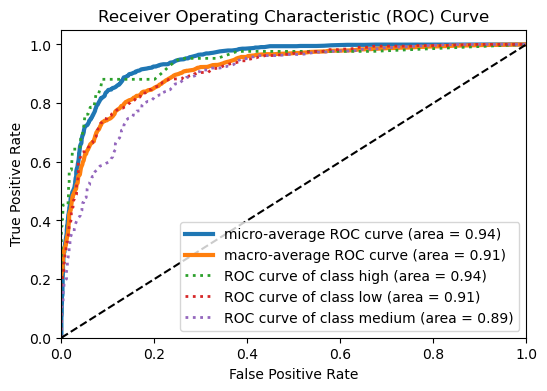

In [37]:
plot_model_roc_curve(rf, X_test_SC, y_test)

# Train, Predict & Evaluate Model using Extreme Gradient Boosting

In [38]:
wqp_features = df_wines.iloc[:, :-3]
wqp_class_labels = np.array(df_wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)

wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features, wqp_class_labels, test_size = 0.2, random_state = 21)

In [39]:
# Define the scaler 
wqp_ss = StandardScaler().fit(wqp_train_X)

wqp_train_SX = wqp_ss.transform(wqp_train_X) # Scale train set
wqp_test_SX = wqp_ss.transform(wqp_test_X)   # Scale test set

In [40]:
# Label encoding our classes
le = LabelEncoder()
num_classes = 3

wqp_train_y_le = le.fit_transform(wqp_train_y)                      # Training dataset
y_train = keras.utils.to_categorical(wqp_train_y_le, num_classes)

wqp_test_y_le = le.fit_transform(wqp_test_y)                      # Testing dataset
y_test = keras.utils.to_categorical(wqp_test_y_le, num_classes)

In [41]:
# print class label encoding map and encoded labels
print('Wine quality type label map:', dict(zip(le.classes_, le.transform(le.classes_))))

print('Sample test label transformation:\n'+'-'*35,
      '\nActual labels:             ', wqp_test_y[:3],
      '\nEncoded Labels:            ', wqp_test_y_le[:3],
      '\nOne hot encoded labels:    ', y_test[:3])

Wine quality type label map: {'high': 0, 'low': 1, 'medium': 2}
Sample test label transformation:
----------------------------------- 
Actual labels:              ['medium' 'medium' 'medium'] 
Encoded Labels:             [2 2 2] 
One hot encoded labels:     [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [42]:
wqp_xgb_model = xgb.XGBClassifier(seed = 25)
%time wqp_xgb_model.fit(wqp_train_SX, y_train)

CPU times: total: 10.4 s
Wall time: 890 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=25, ...)

In [43]:
wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)
wqp_xgb_predictions[:9]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [44]:
predict_classes = np.argmax(wqp_xgb_predictions, axis = 1)
predict_classes

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [45]:
display_model_performance_metrics(true_labels = wqp_test_y_le, predicted_labels = predict_classes, 
                                      classes = [0, 1, 2])

Model Performance metrics:
------------------------------
Accuracy: 0.7731
Precision: 0.7846
Recall: 0.7731
F1 Score: 0.7778

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.22      0.38      0.27        37
           1       0.77      0.71      0.74       484
           2       0.82      0.83      0.83       779

    accuracy                           0.77      1300
   macro avg       0.60      0.64      0.61      1300
weighted avg       0.78      0.77      0.78      1300


Prediction Confusion Matrix:
------------------------------
          Predicted:          
                   0    1    2
Actual: 0         14    1   22
        1         23  344  117
        2         28  104  647


## Get the best hyperparameter values

In [46]:
param_grid = {
                'n_estimators': [100, 200, 300], 
                'max_depth': [5, 10, 15],
                'learning_rate': [0.3, 0.5]
              }

wqp_clf = GridSearchCV(xgb.XGBClassifier(tree_method = 'exact', seed = 34), param_grid, cv = 5, scoring='accuracy')
%time wqp_clf.fit(wqp_train_SX, wqp_train_y_le)

print(wqp_clf.best_params_)

CPU times: total: 33min 13s
Wall time: 2min 31s
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200}


In [47]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100} 0.7787 0.0095
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200} 0.7895 0.0094
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300} 0.7876 0.0124
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100} 0.7949 0.0113
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200} 0.7968 0.0107
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 300} 0.7941 0.0105
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 100} 0.7878 0.017
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 200} 0.791 0.0159
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 300} 0.7912 0.0168
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100} 0.7847 0.01
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200} 0.7862 0.012
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300} 0.7866 0.0045
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100} 0.7918 0.0111
{'learning_rate': 0.5, 'max_depth': 

In [48]:
wqp_xgb_model = xgb.XGBClassifier(seed = 2, max_depth = 10, learning_rate = 0.3, n_estimators = 100)
%time wqp_xgb_model.fit(wqp_train_SX, y_train)

wqp_xgb_prediction_tuned = wqp_xgb_model.predict(wqp_test_SX)

predict_classes_tuned = np.argmax(wqp_xgb_prediction_tuned, axis = 1)
predict_classes_tuned

CPU times: total: 21.6 s
Wall time: 1.63 s


array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [49]:
display_model_performance_metrics(true_labels = wqp_test_y_le, predicted_labels = predict_classes_tuned, 
                                      classes = [0, 1, 2])

Model Performance metrics:
------------------------------
Accuracy: 0.7777
Precision: 0.7947
Recall: 0.7777
F1 Score: 0.7848

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.20      0.41      0.27        37
           1       0.78      0.72      0.75       484
           2       0.83      0.83      0.83       779

    accuracy                           0.78      1300
   macro avg       0.60      0.65      0.62      1300
weighted avg       0.79      0.78      0.78      1300


Prediction Confusion Matrix:
------------------------------
          Predicted:          
                   0    1    2
Actual: 0         15    0   22
        1         29  349  106
        2         31  101  647


## Comparative analysis of Model Feature importances

[11/11] features ████████████████████ Time elapsed: 0 seconds

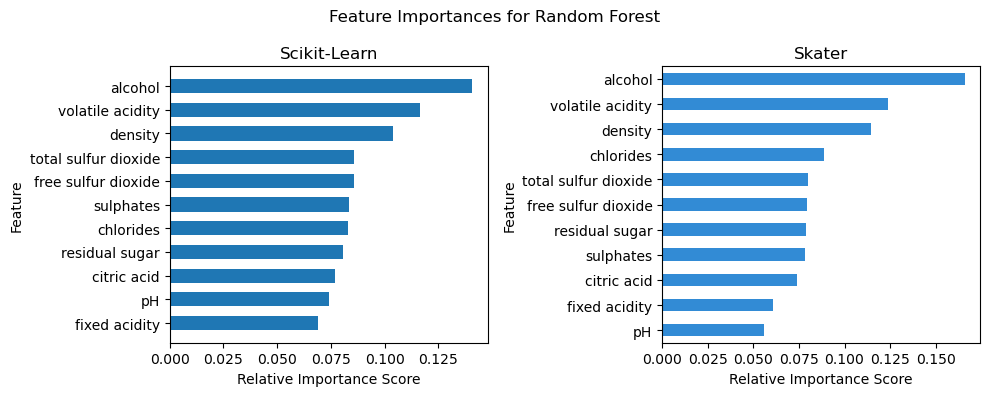

In [50]:
# leveraging skater for feature importances
interpreter = Interpretation(wqp_test_SX, feature_names = wqp_feature_names)
wqp_im_model = InMemoryModel(rf.predict_proba, examples = wqp_train_SX, target_names = rf.classes_)

# retrieving feature importances from the scikit-learn estimator
wqp_rf_feature_importances = rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_rf_feature_importances), key = lambda x: x[1]))

# plot the feature importance plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Feature Importances for Random Forest', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.6)
y_position = list(range(len(wqp_rf_feature_names)))

ax1.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center', tick_label=wqp_rf_feature_names)
ax1.set_title("Scikit-Learn")
ax1.set_xlabel('Relative Importance Score')
ax1.set_ylabel('Feature')

plots = interpreter.feature_importance.plot_feature_importance(wqp_im_model, ascending=False, ax=ax2)
ax2.set_title("Skater")
ax2.set_xlabel('Relative Importance Score')
ax2.set_ylabel('Feature')

plt.tight_layout()

## Interpreting Model Predictions

In [51]:
exp = LimeTabularExplainer(wqp_train_SX, feature_names = wqp_feature_names, 
                           discretize_continuous = True, 
                           class_names = rf.classes_)

In [52]:
exp.explain_instance(wqp_test_SX[10], rf.predict_proba, top_labels=1).show_in_notebook() 

In [53]:
exp.explain_instance(wqp_test_SX[747], rf.predict_proba, top_labels=1).show_in_notebook() 

## Visualizing partial dependencies

[76/76] grid cells ████████████████████ Time elapsed: 13 seconds

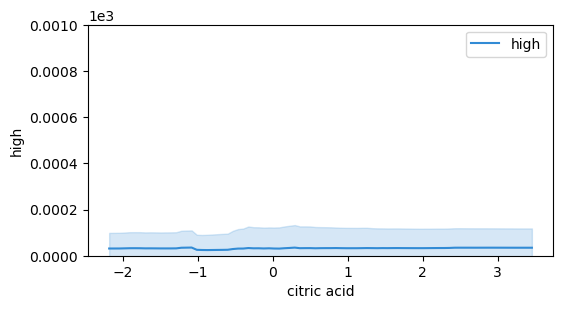

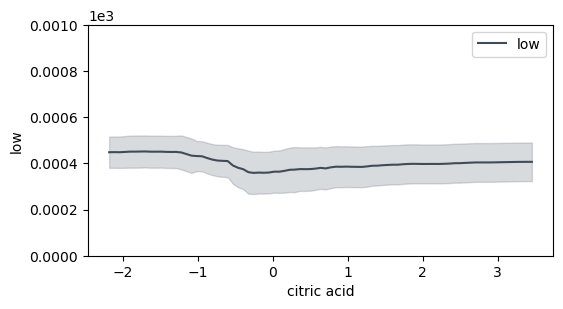

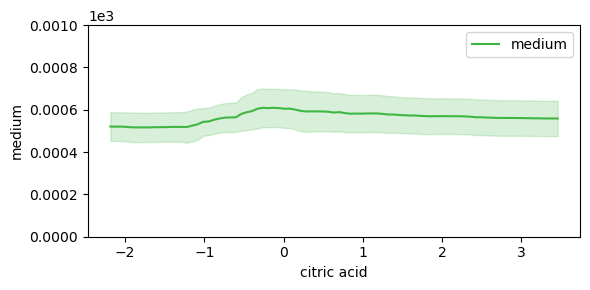

In [54]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(
                                                                   [
                                                                    'citric acid'
                                                                   ], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100, 
                                                                   with_variance = True,
                                                                   figsize = (6, 3)
                                                                  )
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

plt.tight_layout()

[73/73] grid cells ████████████████████ Time elapsed: 12 seconds

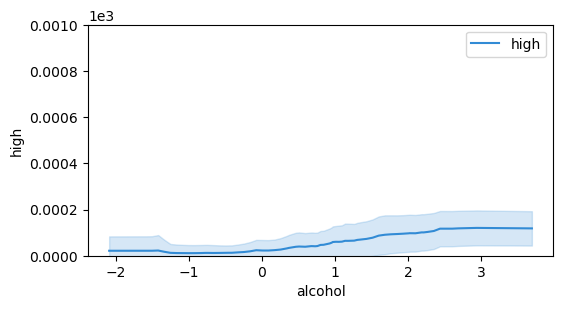

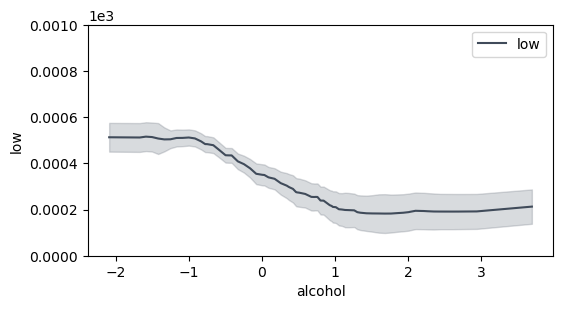

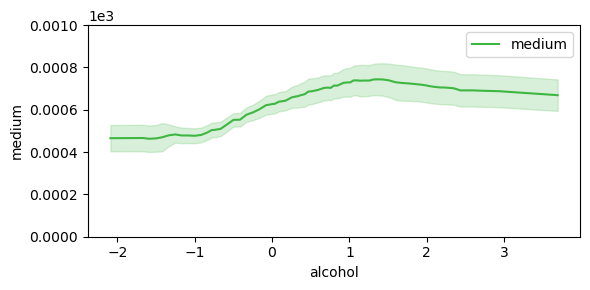

In [57]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(
                                                                   [ 
                                                                    'alcohol', 
                                                                    ], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100, 
                                                                   with_variance = True,
                                                                   figsize = (6, 3)
                                                                  )
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

plt.tight_layout()

[80/80] grid cells ████████████████████ Time elapsed: 13 seconds

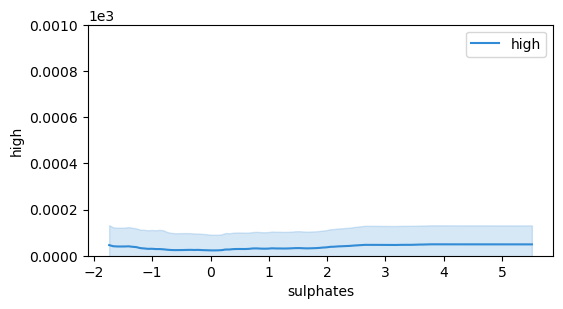

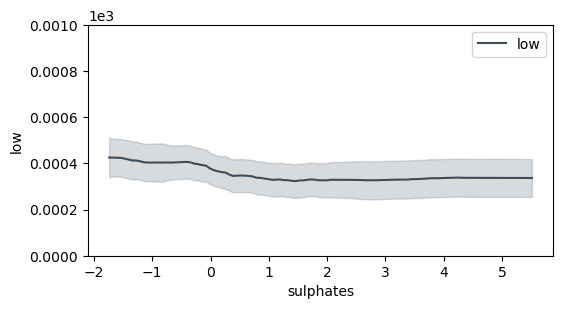

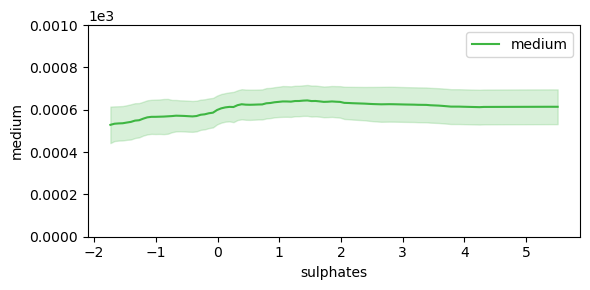

In [58]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(
                                                                   [ 
                                                                    'sulphates', 
                                                                    ], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100, 
                                                                   with_variance = True,
                                                                   figsize = (6, 3)
                                                                  )
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

plt.tight_layout()

[85/85] grid cells ████████████████████ Time elapsed: 14 seconds

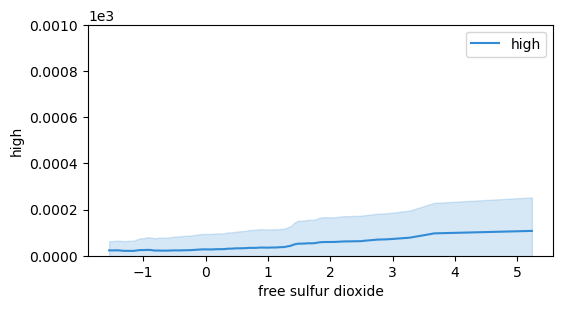

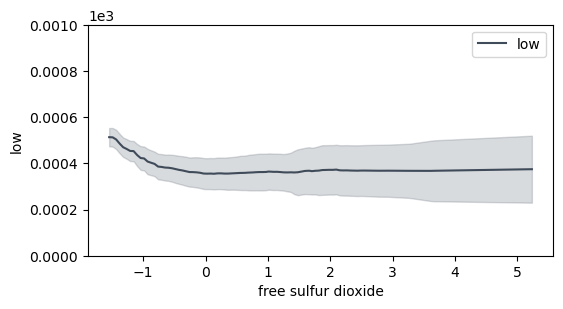

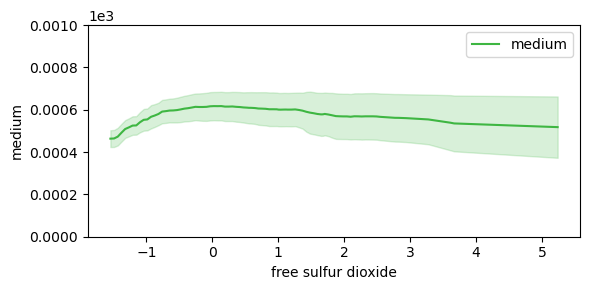

In [59]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(
                                                                   [ 
                                                                    'free sulfur dioxide', 
                                                                    ], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100, 
                                                                   with_variance = True,
                                                                   figsize = (6, 3)
                                                                  )
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

plt.tight_layout()

In [ ]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(
                                                                   [
                                                                    'pH'
                                                                    ], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100, 
                                                                   with_variance = True,
                                                                   figsize = (6, 3)
                                                                  )
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

plt.tight_layout()

We have performed the predictive analysis and noticed that:
* Logistic Regression gave us a f1-score of 0.98 for the Test dataset to predict wine type
* RFM gave us the highest accuracy(0.82) for the Test dataset to predict wine quality

## We will utilize the above two models to make an interactive model!